## Final Evaluation and Visualization


Final Model Evaluation:

               MAE       RMSE      MAPE
ARIMA    10.556540  13.431675  4.494874
SARIMA   10.556540  13.431675  4.494874
Prophet  12.700690  14.734440  5.122084
LSTM     11.650773  14.631819  4.959445

Results saved to Models/final_evaluation.csv


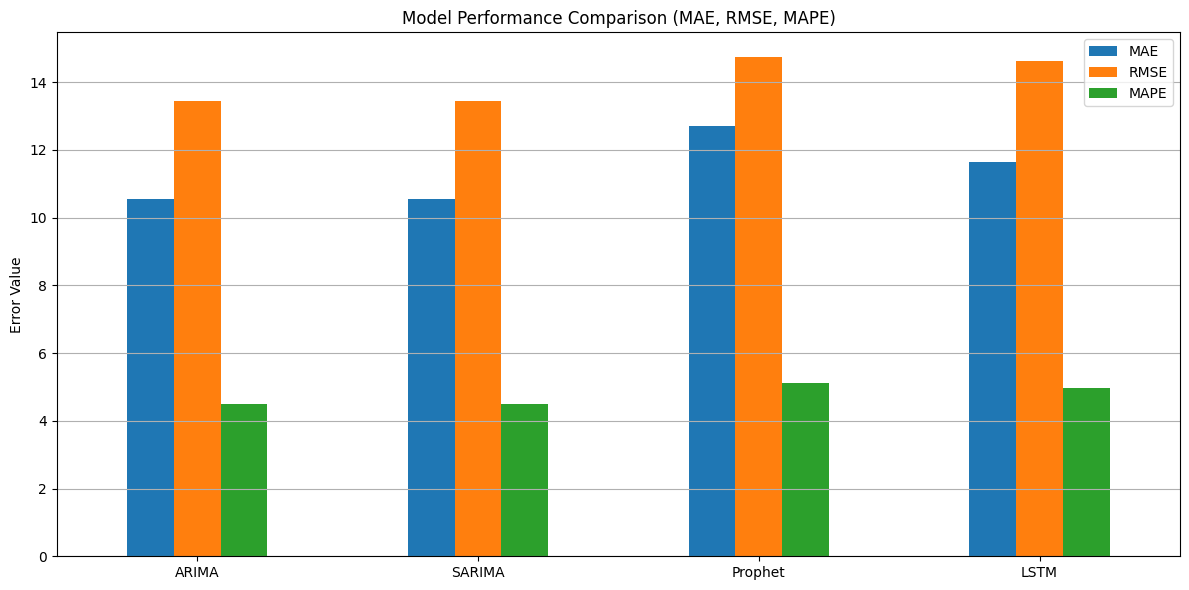


Best model based on RMSE: ARIMA


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load historical dataset
df = pd.read_csv("AAPL_clean.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]

# Load forecasts
arima = pd.read_csv("Models/future_arima.csv", parse_dates=['Date'])
sarima = pd.read_csv("Models/future_sarima.csv", parse_dates=['Date'])
prophet = pd.read_csv("Models/future_prophet.csv", parse_dates=['Date'])
lstm = pd.read_csv("Models/future_lstm.csv", parse_dates=['Date'])

models = {
    "ARIMA": arima,
    "SARIMA": sarima,
    "Prophet": prophet,
    "LSTM": lstm
}

# Align actuals with forecasts 
test_period = min(len(m) for m in models.values())
test_values = df['Close'][-test_period:].astype(float).values

metrics = {}
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true, dtype=float), np.array(y_pred, dtype=float)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for name, forecast in models.items():
    preds = forecast['Forecast'][:test_period].astype(float).values
    true_vals = test_values
    
    mae = mean_absolute_error(true_vals, preds)
    rmse = np.sqrt(mean_squared_error(true_vals, preds))
    mape = mean_absolute_percentage_error(true_vals, preds)
    
    metrics[name] = {"MAE": mae, "RMSE": rmse, "MAPE": mape}

metrics_df = pd.DataFrame(metrics).T
print("\nFinal Model Evaluation:\n")
print(metrics_df)

# Save results
metrics_df.to_csv("Models/final_evaluation.csv")
print("\nResults saved to Models/final_evaluation.csv")

# Visualization
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison (MAE, RMSE, MAPE)")
plt.ylabel("Error Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Best model
best_model = metrics_df['RMSE'].idxmin()
print(f"\nBest model based on RMSE: {best_model}")
